In [3]:
import pandas as pd
import numpy as np

In [6]:
raw_data = pd.read_csv('./raw_data.csv')
raw_data.isna().sum()

school_name            633
area                   633
address                633
level                  633
bus                    640
AddmissionLast Date    983
dtype: int64

In [136]:
cleaned_data = raw_data.dropna(subset=['AddmissionLast Date'])

In [163]:
pd.to_datetime(cleaned_data['AddmissionLast Date'], errors='coerce',dayfirst=True)

0    2021-09-09
2    2021-08-08
7           NaT
8    2021-09-09
9    2023-09-09
10          NaT
11   2021-01-01
13   2021-09-09
14   2021-09-09
15          NaT
16   2021-09-09
17          NaT
18          NaT
19          NaT
22          NaT
23          NaT
Name: AddmissionLast Date, dtype: datetime64[ns]

In [158]:
cleaned_data['AddmissionLast Date'].replace(np.nan,'2021-09-09',inplace=True)

/var/folders/k4/z6f6ppnd4b58v5z7g8jltqdh0000gn/T/ipykernel_57370/1725771352.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data['AddmissionLast Date'].replace(np.nan,'2021-09-09',inplace=True)
/var/folders/k4/z6f6ppnd4b58v5z7g8jltqdh0000gn/T/ipykernel_57370/1725771352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_dat

In [161]:
cleaned_data['school_name'] = cleaned_data['school_name'].str.strip()

/var/folders/k4/z6f6ppnd4b58v5z7g8jltqdh0000gn/T/ipykernel_57370/2514376707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['school_name'] = cleaned_data['school_name'].str.strip()


In [164]:
import matplotlib.pyplot as plt

In [165]:
cleaned_data.head(3)

,school_name,area,address,level,bus,AddmissionLast Date
0,Nanyang Girls' High School,West,"2 Linden Drive, Bukit Timah, S(288683)",Secondry,66;67;74;151;154;156;157;170;171;174;852;961,09-09-2021
2,St. Anthony'S Primary School,West,"30 Bukit Batok St 32, Bukit Batok, S(659401)",Primary,945,08-08-2021
7,Pei Chun Public School,South,"580 Toa Payoh East, Toa Payoh, S(319133)",Primary,232;57,2021-08-08


Text(0, 0.5, 'Level of Schools')

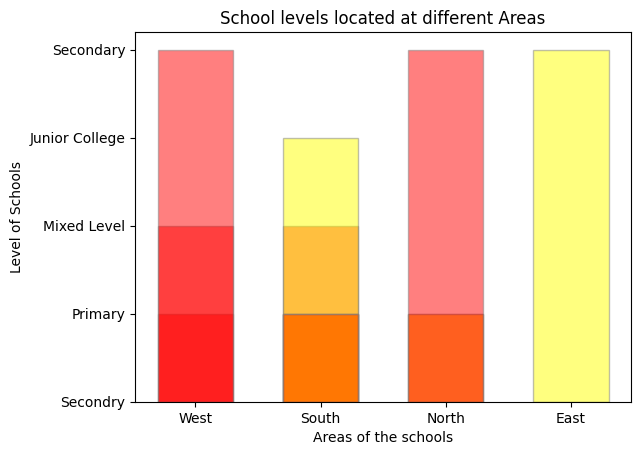

In [ ]:



plt.bar(cleaned_data['area'],cleaned_data['level'],color=['yellow','red'],alpha=0.5,capsize=5,width=.6,edgecolor='gray')
plt.title("School levels located at different Areas")
plt.xlabel("Areas of the schools")
plt.ylabel("Level of Schools")

In [226]:
area = pd.DataFrame(cleaned_data.groupby(['area'])['level'].count()).reset_index()
area

,area,level
0,East,2
1,North,4
2,South,6
3,West,4


Text(0, 0.5, 'Level of Schools')

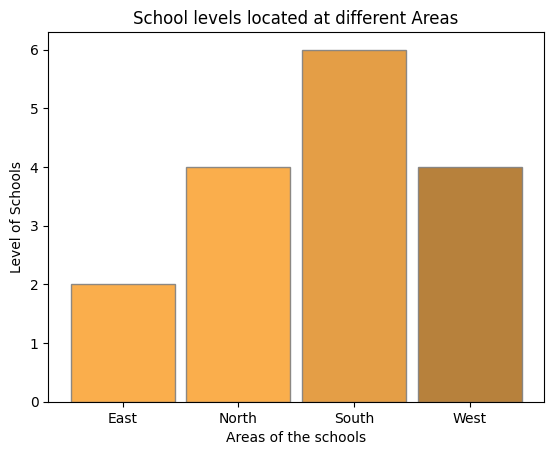

In [232]:
plt.bar(area['area'],area['level'],color=['#faa538', '#faa538','#e19432','#af7327'],alpha=0.9,capsize=5,width=.9,edgecolor='gray')
plt.title("School levels located at different Areas")
plt.xlabel("Areas of the schools")
# plt.text(area['level'])
# plt.Widget
plt.ylabel("Level of Schools")